# Going Worldwide: A Comparison of National and International NBA Players

## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [X] YES - make available
- [ ] NO - keep private

# Names

- Colby Hillers
- Calvin Cheung
- Jorge Mendoza
- Javon Maxie
- Hoang Nguyen

# Overview

Upon completing this study, we aim to explore the differences between national and international talent in the NBA. For a thorough comparison, we analyzed game statistics of regular season NBA games played since the 1999-2000 season. We performed statistical analyses on multiple statistics across multiple seasons for national and international players and pitted them against each other. Our results revealed that national NBA players do not perform better than their international counterparts. Our data showed that national players only outperformed international players when it comes to steals and field goal percentage. On the other hand, international players either have the edge or performed as well as national players when it comes to points, assists, rebounds, blocks, turnovers, personal fouls, and other statistics involving field goal percentage. Thus, the data suggests that national players do not outperform international players in the NBA.

<a id='research_question'></a>
# Research Question


In the NBA, over the regular season, do international players have a higher Individual Efficiency Metric (EFF), a metric that takes into account points, rebounds, assists, steals, blocks, missed field goals and free throws, turnovers, and games played, than players born in the United States?

# Background & Prior Work

The dominance of international talent such as Luka Doncic, Nikola Jokic, and Giannis Antetokounmpo in the National Basketball Association (NBA) is impossible to ignore. These players, however, were only a few of the standout international players. This past season, six international players were indoctrinated to the All-NBA Team, an honor granted to the overall best players in the league for that season [1]. The presence of international talent in the NBA has also seen a steady incline as, in the league's first season in 1946-47, there were a mere five international players compared to a record 113 international players at the start of the 2016-17 season [1]. After seeing these statistics, it becomes clear that international players are undoubtedly leaving their mark and making history in the league. As fans of the NBA, we became curious and set out to compare the performances of international and national talent in the league.

In an article from HoopsHype, a branch of USA Today Sports, Frank Urbina constructs a hypothetical roster of players for a USA vs. Rest of the World game with the USA roster consisting of the best USA NBA players and the Rest of the World roster consisting of the best international NBA players. Urbina believes the international team have the advantage in playmaking and rebounding while US players have the edge when it comes to shooting and athleticism [2]. Urbina stresses how close he thinks the matchup would be, but overall believes that team USA would have the slight edge [2]. The matchup Urbina has constructed is only hypothetical and inconclusive in which he makes use of speculation to compare how players would match up against each other. In our study, we plan to attach empirical data to these players to see how they truly compare against each other.

On the subject of calculating a player's performance, an article from Watts Basketball discussing how professionals in the league calculate player efficiency will be of use to us. We decided to go with the Efficiency Metric (EFF) which adds up total points, rebounds, assists, blocks, and steals, while also accounting for turnovers and missed field goals and free throws [3]. We will then divide this score by the total amount of minutes played throughout the regular season for each individual player [3]. We plan to do this for each season so we can also track how player performance fluctuates from season to season. This formula aids in our study as it gives us a method of attaching a quantitative value to a player in order to ensure we have a fair comparison.

References:

1) https://www.nba.com/news/nba-rosters-feature-109-international-player

2) https://hoopshype.com/lists/nba-all-star-game-theoretical-usa-vs-world/

3) https://wattsbasketball.com/blog/how-to-calculate-player-efficiency-rating


# Hypothesis

When compared to national players, international players need to make a much bigger commitment when declaring for the NBA draft. We predict that players born in the US will, on average, have a higher EFF rating when compared to international players mainly because of location. American players will be playing on familiar courts while international players will be on foreign courts. Furthermore, international leagues have slight differences in rules and regulations, leaving international players with a couple extra hurdles to overcome.

# Dataset(s)


- Dataset Name: Basketball Players Stats. Extended analysis.
- Link to the dataset: https://www.kaggle.com/isaienkov/basketball-players-stats-extended-analysis/data
- Number of observations: 53,949

The number of observations in this dataset is the number of games played since the 1999-2000 season.

This dataset, containing a multitude of basketball game statistics for each player, is found on Kaggle.

# Setup

In [ ]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

pd.options.mode.chained_assignment = None  # turn off 'SettingWithCopyWarning'

# Data Cleaning

We obtained our dataset from Kaggle. The included data was already clean and organized which meant it was ready for us to work with. All the relevant players were already stored in rows while all the relevant statistics we needed had their own columns. The data was already saved in a csv file so we simply had to upload it to github for ease of access.

Upon looking at our dataset, our first plans of action were to check the shape and info in addition to checking for missing values. We then filtered the dataset to only include data from the regular season as this was the scope of our research question. We then dropped irrelevant columns that we deemed weren't necessary for calculating a player's EFF to tidy our dataset. Finally, we added in columns which weren't already included that are necessary for analysis and calculated the EFF for each player (Missed FG, Missed FT, and EFF).

To answer our research question, we must successfully group every player into national or international. Some players, however, had multiple nationalities listed. This became problematic when the player had United States / (other) listed since we had to decide whether the player was national or international. We deduced that, when a player has multiple nationalities listed, they mostly identified with their first listed nationality. For example, if a player had United States / Mexico then we would list them as United States. If a player had Mexico / United States we would list them as Mexico. This allowed us to label every player as national or international in order for us to conduct our analysis


In [ ]:
# read the data
df = pd.read_csv('players_stats_by_season_full_details.csv')

# check the first five rows
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.00000,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.00000,Mar,"Mar 6, 1972",7-1,216.00000,325.00000,147.00000,United States,Robert G. Cole High School,1.00000,1.00000,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.00000,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.00000,Jan,"Jan 26, 1977",6-6,198.00000,220.00000,100.00000,United States,Mainland High School,1.00000,5.00000,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.00000,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.00000,Jul,"Jul 24, 1963",6-9,206.00000,265.00000,120.00000,United States,Summerfield High School,1.00000,13.00000,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.00000,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.00000,Jun,"Jun 7, 1975",6-0,183.00000,165.00000,75.00000,United States,Bethel High School,1.00000,1.00000,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.00000,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.00000,Jul,"Jul 23, 1968",6-4,193.00000,180.00000,82.00000,United States,Skyline High School,1.00000,2.00000,Seattle SuperSonics


In [ ]:
# check the shape of the dataset
df.shape

(53949, 34)

In [ ]:
# check info and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

In [ ]:
# return the rows with one or more missing data
null_rows = df[df.isnull().any(axis=1)] 

# check for the total of rows with at least one missing data
df.isnull().any(axis=1).sum()

46113

The columns with missing values are irrelevant for our analysis because they do not indicate players' performance in basketball. 

In [ ]:
# check to see which columns have missing data
df.isnull().any()

League         False
Season         False
Stage          False
Player         False
Team            True
GP             False
MIN            False
FGM            False
FGA            False
3PM            False
3PA            False
FTM            False
FTA            False
TOV            False
PF             False
ORB            False
DRB            False
REB            False
AST            False
STL            False
BLK            False
PTS            False
birth_year      True
birth_month     True
birth_date      True
height          True
height_cm       True
weight          True
weight_kg       True
nationality     True
high_school     True
draft_round     True
draft_pick      True
draft_team      True
dtype: bool

In [ ]:
# filter the data based on regular season only
df = df[(df.Stage == 'Regular_Season')]

# slicing to display all rows and remove the last four columns (high_school, draft_round, draft_pick, and, draft_team)
# we do not need these four columns for analysis
df = df.iloc[:, :30]

Luckily, the columns that we removed (or do not care about) happen to contain missing values so we don't need to worry about NaNs. Now, there are no missing values in our data.

In [ ]:
# dropping these columns since they are irrelevant for our analysis
df = df.drop(['Team', 'League', 'Stage', 'birth_year', 'birth_month', 'birth_date','height', 'height_cm', 'weight', 'weight_kg'],  axis = 1)

# describe the statistics of numerical features
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
count,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000,4658.00000
mean,73.17647,1950.10949,311.48411,679.86196,60.45535,167.09296,153.72692,201.06226,112.20116,163.17325,88.76750,255.98325,344.75075,182.65200,61.80249,39.51589,837.15071
std,8.75105,637.08006,161.07167,343.60843,57.46570,149.34275,116.25995,145.44548,60.10069,52.90532,67.35876,137.79109,193.77163,148.39861,32.54009,39.98981,447.53133
min,1.00000,0.70000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,69.00000,1473.00000,189.00000,416.25000,3.00000,16.00000,71.00000,94.25000,67.00000,125.00000,36.00000,158.00000,205.00000,77.00000,38.00000,13.00000,495.25000
50%,75.00000,1955.10000,281.00000,621.00000,51.00000,150.00000,121.00000,162.00000,101.00000,162.00000,68.00000,223.00000,298.00000,136.00000,56.00000,26.00000,751.00000
75%,80.00000,2439.67500,409.00000,890.00000,99.00000,268.00000,202.00000,265.00000,146.00000,200.00000,125.00000,324.00000,439.00000,242.00000,80.00000,51.00000,1094.00000
max,85.00000,3485.00000,978.00000,2173.00000,402.00000,1028.00000,756.00000,972.00000,464.00000,371.00000,440.00000,894.00000,1247.00000,925.00000,225.00000,307.00000,2832.00000


Now what we need to do is separate players into two different DataFrames based on their nationality. This will help with a lot of the stat. comparisons that we will be doing later on.

In [ ]:
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

Now let's view our two new DataFrames to make sure they look like what we expect.

In [ ]:
df_US.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality
0,1999 - 2000,Shaquille O'Neal,79,3163.00000,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,United States
1,1999 - 2000,Vince Carter,82,3126.00000,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,United States
2,1999 - 2000,Karl Malone,82,2947.00000,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,United States
3,1999 - 2000,Allen Iverson,70,2853.00000,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,United States
4,1999 - 2000,Gary Payton,82,3425.00000,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,United States


In [ ]:
df_INT.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality
30,1999 - 2000,Dirk Nowitzki,82,2938.00000,515,1118,116,306,289,348,141,256,102,430,532,203,63,68,1435,Germany
60,1999 - 2000,Rik Smits,79,1852.00000,431,890,0,1,156,211,108,249,94,307,401,85,20,100,1018,Netherlands
65,1999 - 2000,Vlade Divac,82,2374.00000,384,764,7,26,230,333,190,251,174,482,656,244,103,103,1005,Serbia
78,1999 - 2000,Dikembe Mutombo,82,2984.00000,322,573,0,0,298,421,174,248,304,853,1157,105,27,269,942,Democratic Republic of the Congo
80,1999 - 2000,Patrick Ewing,62,2035.00000,361,775,0,2,207,283,142,196,140,464,604,58,36,84,929,United States / Jamaica


From the summary above, we can see there is an instance where one player has their nationality listed as United States / Jamaica. This is problematic since we group players as international or national. There are more than likely other instances of players like this, so we need to determine a way to classify these them properly. 

To start, let's first see how many players there are that share the United States and another country as their nationality.

In [ ]:
# gets players who have multiple nationalities
df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')].shape

(173, 20)

Here we see that there are 173 instances that we need to properly classify. Now we want to single out each player, but since some players appear multiple times we're going to use the ```unique()``` indentifier.

In [ ]:
# lists out nationalities
df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')]['Player'].unique()

array(['Patrick Ewing', 'Wally Szczerbiak', 'Shawn Bradley',
       'Detlef Schrempf', 'Adonal Foyle', 'Carlos Boozer', 'Milt Palacio',
       'Carlos Arroyo', 'Jarvis Hayes', 'Chris Kaman', 'Dan Gadzuric',
       'Ben Gordon', 'Charlie Villanueva', 'Ime Udoka', 'Al Horford',
       'Andray Blatche', 'Joakim Noah', 'J.J. Barea', 'Donte Greene',
       'Sam Young', 'Al-Farouq Aminu', 'Ekpe Udoh', 'Kosta Koufos',
       'Maurice Harkless', 'Reggie Jackson', 'Kyrie Irving',
       'Nick Calathes', 'Shane Larkin', 'Karl-Anthony Towns',
       'Trey Lyles', 'Domantas Sabonis', 'Justin Hamilton',
       'Shabazz Napier', 'Emmanuel Mudiay', 'Ogugua Anunoby',
       'Abdel Nader', 'Josh Okogie', 'T.J. Leaf', 'John Holland'],
      dtype=object)

In [ ]:
# count how many players there are
len(df[df['nationality'].str.contains('United States /') | df['nationality'].str.contains('/ United States')]['Player'].unique())

39

From the check we just did we can see that there are 39 players that have another nationality besides 'United States'. Since there are only 26, it is best to manually sort through these players to determine if they are international or US. An example is that players like Kyrie Irving and Patrick Ewing are clearly US players, but players like Domantas Sabonis and Ime Udoka are clearly international players. The best way to sort through these players is to Google each one and see what country they played in before they were drafted and which national team they played for IF they were in the olympics. 

Following this, we created the ```place_nationality``` function seen below to take in a string and place a player into a single nationality based on our research. 

In [ ]:
# places players in single nationality based off represented region
def place_nationality(string):
  # Sorts players into singular nationality if listed as US / (other)
  # Players through background research on each player
  string = string.replace('United States / Jamaica', 'United States')
  string = string.replace('United States / Spain', 'United States')
  string = string.replace('United States / Germany', 'United States')
  string = string.replace('Germany / United States', 'Germany')
  string = string.replace('Saint Vincent and the Grenadines / United States', 'Saint Vincent and the Grenadines')
  string = string.replace('United States / Norway', 'United States')
  string = string.replace('Puerto Rico / United States', 'Puerto Rico')
  string = string.replace('United States / Qatar', 'United States')
  string = string.replace('Netherlands / United States', 'Netherlands')
  string = string.replace('England / United States', 'England')
  string = string.replace('United States / Dominican Republic', 'United States')
  string = string.replace('United States / Nigeria', 'United States')
  string = string.replace('Dominican Republic / United States', 'Dominican Republic')
  string = string.replace('United States / Philippines', 'United States')
  string = string.replace('France / United States', 'France')
  string = string.replace('United States / Lebanon', 'United States')
  string = string.replace('United States / Greece', 'United States')
  string = string.replace('United States / Puerto Rico', 'United States')
  string = string.replace('Italy / United States', 'Italy')
  string = string.replace('United States / Australia', 'United States')
  string = string.replace('United States / Turkey', 'United States')
  string = string.replace('Canada / United States', 'Canada')
  string = string.replace('United States / Lithuania', 'United States')
  string = string.replace('United States / Croatia', 'United States')
  string = string.replace('United States / Democratic Republic of the Congo', 'United States')
  string = string.replace('United States / Egypt', 'United States')
  string = string.replace('Nigeria / United States', 'Nigeria')
  string = string.replace('United States / Israel', 'United States')

  return string

From our research, we realized that in most cases the first nationality listed was the player's primary nationality. So if 'United States' wasn't listed first they were more than likely not international. There were only a few cases where this wasn't true, so we had to manually sort through each player's nationality and then edit what their nationality. Next we apply the ```place_nationality``` function to the original DataFrame.

In [ ]:
# apply function to nationality column
df['nationality'] = df['nationality'].apply(place_nationality)

# lists out nationalities
df['nationality'].unique()

array(['United States', 'Germany', 'Netherlands', 'Serbia',
       'Democratic Republic of the Congo', 'Serbia / Greece',
       'Nigeria / England', 'Lithuania', 'Ukraine', 'Canada / Bahamas',
       'Slovenia', 'Australia', 'Haiti',
       'Saint Vincent and the Grenadines', 'Canada / South Africa',
       'Dominican Republic', 'Turkey', 'Canada', 'Finland', 'Spain',
       'Russia', 'France', 'Mexico', 'China', 'Croatia', 'Brazil',
       'Montenegro', 'Argentina', 'Georgia', 'Senegal', 'Puerto Rico',
       'Czech Republic', 'Canada / Haiti', 'England',
       'England / South Sudan', 'Netherlands / South Sudan', 'Latvia',
       'Italy', 'Argentina / Italy', 'Switzerland', 'England / Nigeria',
       'Cameroon', 'Poland', 'Israel', 'Sweden',
       'Republic of the Congo / Spain', 'Venezuela', 'Panama',
       'Switzerland / Turkey', 'Switzerland / Montenegro', 'Nigeria',
       'Tanzania', 'Bosnia and Herzegovina', 'Greece / Nigeria',
       'New Zealand', 'Montenegro / Spain',
 

In [ ]:
# Places international and US players in respectives dataframes
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

Now that all the players are in their correct DataFrames we are going to modify some of the columns so it is easier to interpret their data in our analysis. For starters we're going to convert all stats into season averages which consists of: 

$$\frac{Stat}{Games Played(GP)}$$

In [ ]:
df_US.columns

Index(['Season', 'Player', 'GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM',
       'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS',
       'nationality'],
      dtype='object')

In [ ]:
# Convert each players total season stats into season averages
df_US.iloc[:,3:19] = df.iloc[:,3:19].div(df_US['GP'], axis=0)
df_INT.iloc[:,3:19] = df.iloc[:,3:19].div(df_INT['GP'], axis=0)

Now that we've converted all stats. to season averages for each player and each season, we're going to create 3 new columns for each shooting percentage(FG%, FT%, and 3PGM%). The calculation for this is seen as:

$$\frac{Shots Made}{Shots Attempted}$$

In [ ]:
# Create new columns for field-goal percentage for each shot
df_US['FG%'] = df_US['FGM'] / df_US['FGA']
df_INT['FG%'] = df_INT['FGM'] / df_INT['FGA']

df_US['FT%'] = df_US['FTM'] / df_US['FTA']
df_INT['FT%'] = df_INT['FTM'] / df_INT['FTA']

df_US['3PFG%'] = df_US['3PM'] / df_US['3PA']
df_INT['3PFG%'] = df_INT['3PM'] / df_INT['3PA']

# In case shots attemped was 0, set percentage to 0%
df_US['FG%'] = df_US['FG%'].fillna(0)
df_INT['FG%'] = df_INT['FG%'].fillna(0)

df_US['FT%'] = df_US['FT%'].fillna(0)
df_INT['FT%'] = df_INT['FT%'].fillna(0)

df_US['3PFG%'] = df_US['3PFG%'].fillna(0)
df_INT['3PFG%'] = df_INT['3PFG%'].fillna(0)

We finally have all of our data properly cleaned up and ready for EDA, so lets view it one last time.

In [ ]:
df_US.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality,FG%,FT%,3PFG%
0,1999 - 2000,Shaquille O'Neal,79,40.03797,12.10127,21.07595,0.00000,0.01266,5.46835,10.43038,2.82278,3.22785,4.25316,9.39241,13.64557,3.78481,0.45570,3.02532,29.67089,United States,0.57417,0.52427,0.00000
1,1999 - 2000,Vince Carter,82,38.12195,9.60976,20.68293,1.15854,2.87805,5.31707,6.71951,2.17073,3.20732,1.82927,3.97561,5.80488,3.92683,1.34146,1.12195,25.69512,United States,0.46462,0.79129,0.40254
2,1999 - 2000,Karl Malone,82,35.93902,9.17073,18.00000,0.02439,0.09756,7.18293,9.01220,2.81707,2.79268,2.06098,7.43902,9.50000,3.70732,0.96341,0.86585,25.54878,United States,0.50949,0.79702,0.25000
3,1999 - 2000,Allen Iverson,70,40.75714,10.41429,24.75714,1.27143,3.72857,6.31429,8.85714,3.28571,2.31429,1.01429,2.80000,3.81429,4.68571,2.05714,0.07143,28.41429,United States,0.42066,0.71290,0.34100
4,1999 - 2000,Gary Payton,82,41.76829,9.10976,20.31707,2.15854,6.34146,3.79268,5.15854,2.73171,2.17073,1.21951,5.23171,6.45122,8.92683,1.86585,0.21951,24.17073,United States,0.44838,0.73522,0.34038


In [ ]:
df_INT.head()

,Season,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,nationality,FG%,FT%,3PFG%
30,1999 - 2000,Dirk Nowitzki,82,35.82927,6.28049,13.63415,1.41463,3.73171,3.52439,4.24390,1.71951,3.12195,1.24390,5.24390,6.48780,2.47561,0.76829,0.82927,17.50000,Germany,0.46064,0.83046,0.37908
60,1999 - 2000,Rik Smits,79,23.44304,5.45570,11.26582,0.00000,0.01266,1.97468,2.67089,1.36709,3.15190,1.18987,3.88608,5.07595,1.07595,0.25316,1.26582,12.88608,Netherlands,0.48427,0.73934,0.00000
65,1999 - 2000,Vlade Divac,82,28.95122,4.68293,9.31707,0.08537,0.31707,2.80488,4.06098,2.31707,3.06098,2.12195,5.87805,8.00000,2.97561,1.25610,1.25610,12.25610,Serbia,0.50262,0.69069,0.26923
78,1999 - 2000,Dikembe Mutombo,82,36.39024,3.92683,6.98780,0.00000,0.00000,3.63415,5.13415,2.12195,3.02439,3.70732,10.40244,14.10976,1.28049,0.32927,3.28049,11.48780,Democratic Republic of the Congo,0.56195,0.70784,0.00000
86,1999 - 2000,Peja Stojakovic,74,23.63514,4.33784,9.68919,1.35135,3.60811,1.82432,2.06757,1.18919,1.31081,1.00000,2.72973,3.72973,1.43243,0.70270,0.09459,11.85135,Serbia / Greece,0.44770,0.88235,0.37453


### Column Glossary:

***Categorical information:***

- **Season:** The season corresponding to row(1999-2000 to 2019-2020)
- **Player:** Name of player
- **GP:** Games played that season

***Stats. below are listed as averages per games played:***

- **MIN:** Minutes played
- **FGM:** Field goals made
- **FGA:** Field goals attempted
- **FTM:** Free throws made
- **FTA:** Free throws attempted
- **TOV:** Turnovers committed
- **PF:** Personal fouls committed
- **ORB:** Offensive rebounds
- **DRB:** Defensive rebounds
- **REB:** Total rebounds
- **AST:** Assists
- **STL:** Steals
- **BLK:** Blocks
- **PTS:** Points
- **FG%:** Field goal percentage
- **FT%:** Free throw percentage
- **3PFG%:** 3-Point field goal percentage

# Data Analysis & Results (EDA)

In [ ]:
df_US.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,FG%,FT%,3PFG%
count,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000,3805.00000
mean,73.23127,26.76543,4.27529,9.40865,0.85639,2.37382,2.12094,2.77133,1.53295,2.20690,1.16208,3.41332,4.57539,2.52882,0.87190,0.51259,11.52791,0.45406,0.75485,0.28754
std,8.72850,7.59534,2.13031,4.55766,0.78479,2.04071,1.58129,1.97604,0.79882,0.63190,0.86094,1.75563,2.46357,1.96852,0.43323,0.51025,5.96470,0.05444,0.09862,0.14702
min,1.00000,0.70000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,69.00000,20.88784,2.67073,5.92683,0.07500,0.32857,1.00000,1.35135,0.92208,1.76056,0.49206,2.17284,2.78947,1.10638,0.55385,0.18293,7.06098,0.41997,0.70588,0.25000
50%,75.00000,27.03704,3.85915,8.54667,0.75676,2.21429,1.67213,2.23529,1.36250,2.19737,0.90123,3.00000,3.98667,1.92453,0.79661,0.34783,10.23171,0.44589,0.77228,0.33673
75%,80.00000,33.04583,5.50667,12.23457,1.38272,3.74390,2.80247,3.61039,2.00000,2.64935,1.63158,4.25373,5.76923,3.32500,1.10294,0.65000,14.87671,0.48009,0.82391,0.37624
max,85.00000,43.70000,12.22500,27.81667,5.13043,13.17949,10.17647,13.13514,5.72840,4.52439,5.43210,11.41096,15.98718,11.69811,2.88525,3.72152,36.12821,0.74194,1.00000,1.00000


In [ ]:
df_INT.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,FG%,FT%,3PFG%
count,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000,853.00000
mean,72.93200,24.93924,4.00329,8.40555,0.70315,1.92403,1.89357,2.49311,1.46728,2.24598,1.37764,3.75521,5.13285,2.24376,0.69042,0.64034,10.60331,0.47699,0.74701,0.26070
std,8.85194,7.16433,1.90598,3.87810,0.73285,1.90631,1.30158,1.61144,0.68442,0.62050,0.94802,1.90008,2.65669,1.90676,0.32566,0.58621,5.18651,0.05915,0.10624,0.17674
min,4.00000,8.58060,0.56452,1.09677,0.00000,0.00000,0.06667,0.17742,0.25373,0.73529,0.08065,0.62500,0.80556,0.10390,0.09091,0.00000,1.40323,0.29262,0.26154,0.00000
25%,68.00000,19.00000,2.49254,5.29851,0.00000,0.03947,0.91935,1.25610,0.93151,1.77500,0.57143,2.36585,3.09524,0.94286,0.45000,0.19718,6.44928,0.43646,0.69892,0.00000
50%,75.00000,25.19048,3.65000,7.87805,0.52778,1.55844,1.55556,2.07792,1.37500,2.24390,1.16176,3.31250,4.53968,1.64634,0.63415,0.43750,9.72581,0.46667,0.76437,0.33333
75%,80.00000,31.06301,5.28205,10.92537,1.25333,3.36842,2.48780,3.23077,1.89041,2.69333,1.98246,4.85000,6.86250,2.98780,0.88571,0.94872,13.98611,0.51231,0.81818,0.37676
max,82.00000,40.29630,10.87302,20.57377,3.76389,9.55556,8.15625,10.14062,4.26230,4.01282,5.05263,11.36508,14.10976,11.63158,2.32927,3.65152,29.47619,0.69300,0.93778,1.00000


## Career Box Score Stats EDA

This is just basic data analysis on the standard box scores averages over every players career between 2000 to 2020. 


In [ ]:
def shooting_eff_data(data1, data2, stat1, stat2, bins):

  FG_avg_1 = data1[stat1] / data1[stat2]
  FG_avg_2 = data2[stat1] / data2[stat2]

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=FG_avg_1, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=data2, x=FG_avg_2, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')

  fig.tight_layout(pad=3)

  fig.show()

In [ ]:
# Function that takes in DataFrame and column and averages the values and displays histogram

def stats_data(data1, data2, stat, bins, xlim):

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=stat, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,xlim), title='United States')
  sns.histplot(data=data2, x=stat, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,xlim), title='International')

  fig.tight_layout(pad=3)

  fig.show()

### Field Goal Percentage (FGM / FGA)

Effective Field Goal Percentage: $$\frac{Points}{2 * (FGA+0.44*FTA)}$$

Standard Field-Goal Percentage


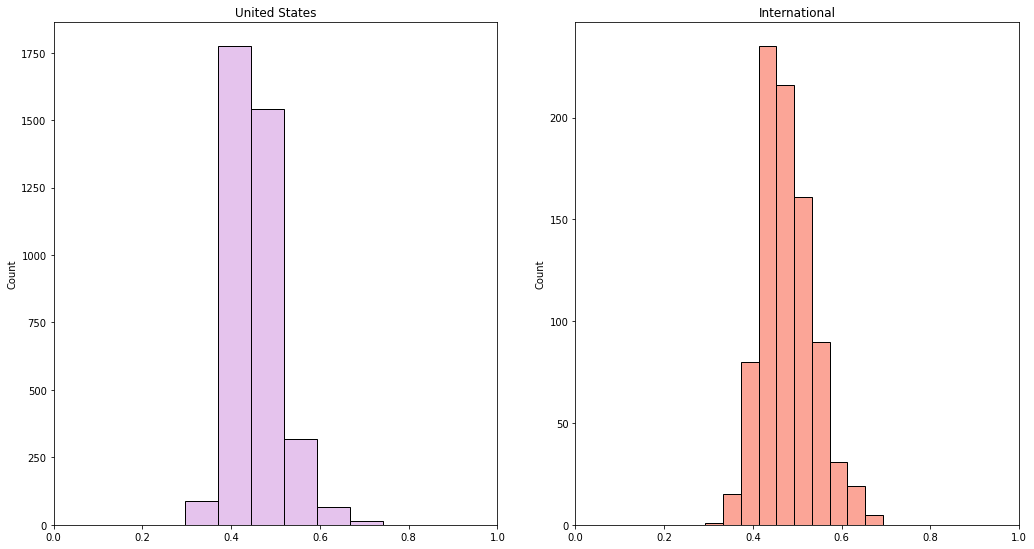

In [ ]:
print('Standard Field-Goal Percentage')
shooting_eff_data(df_US, df_INT, 'FGM', 'FGA', 10)

We see both distributions are centered around 0.4-0.5 with no obvious outliers

Effective Field-Goal Percentage


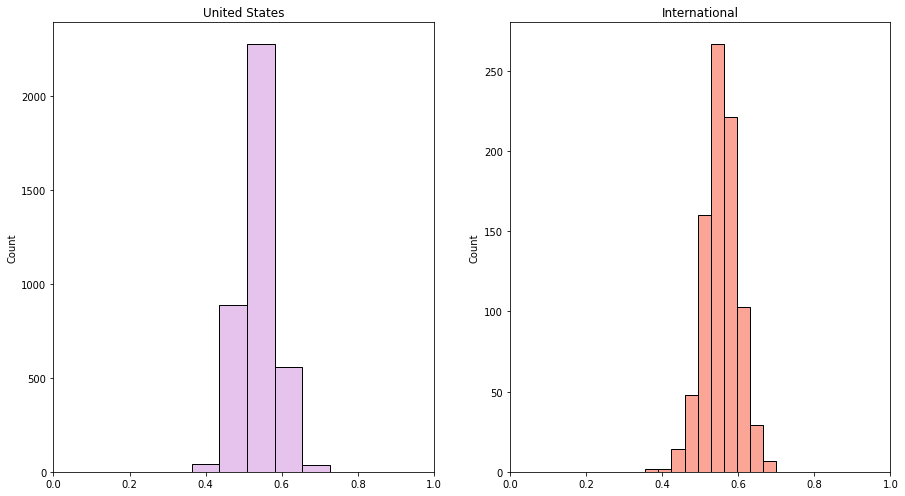

In [ ]:
def effective_fg_per(US_data, INT_data, points, FGA, FTA, bins):
  
  avg_US = US_data[points] / (2*(US_data[FGA] + 0.44*US_data[FTA]))
  avg_INT = INT_data[points] / (2*(INT_data[FGA] + 0.44*INT_data[FTA]))

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')
  fig.show()

print('Effective Field-Goal Percentage')
effective_fg_per(df_US, df_INT, 'PTS', 'FGA', 'FTA', 10)

We see both distributions are centered around 0.5 with no obvious outliers

### Free Throw Percentage (FTM / FTA)

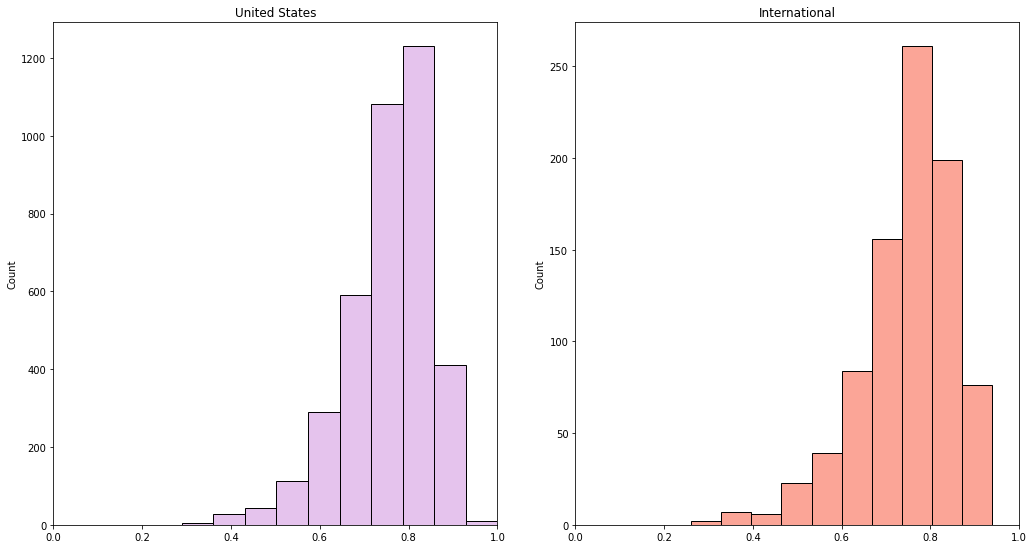

In [ ]:
shooting_eff_data(df_US, df_INT, 'FTM', 'FTA', 10)

We notice both distributions are skewed left, but we also notice that the US has players shooting a high 90% from the free throw line while international does not.

### Turnovers

Average Turnovers


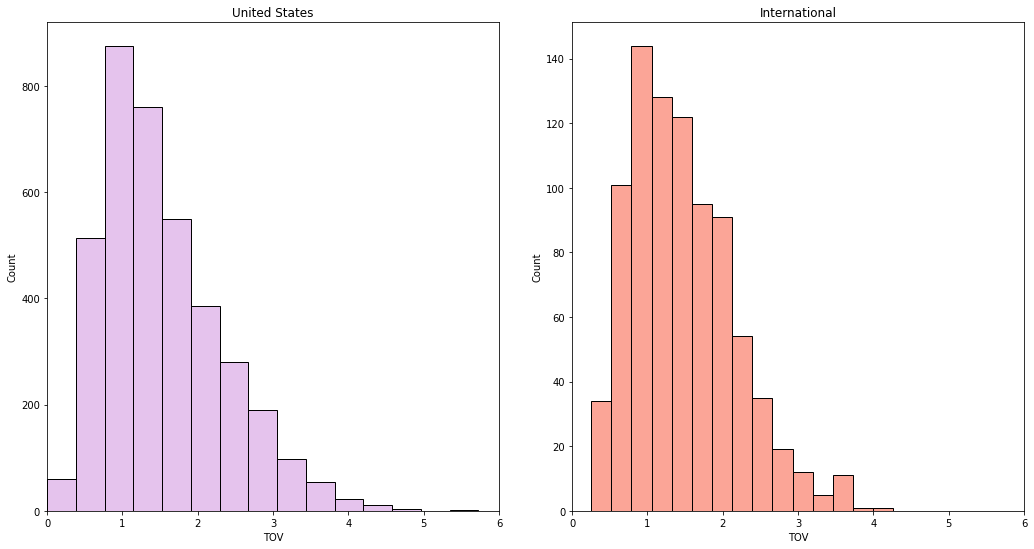

In [ ]:
print('Average Turnovers')
stats_data(df_US, df_INT, 'TOV', 15, 6)

We both distributions are skewed to the right, however we see that the US distributions stretches farther right than the International. Additionally, it has an outlier at roughly 5.5.

Turnover Percentage: $$\frac{TOV}{FGA+0.44*FTA+TOV}$$

This statistic is an estimation of the number of turnovers a player will commit every 100 plays(Will go into more detail in final project).

Turnover Percentage


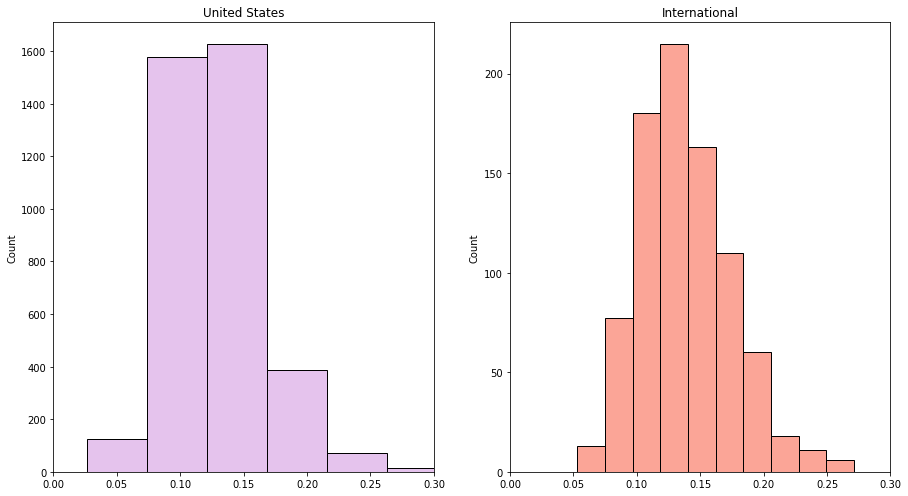

In [ ]:
def turnover_per(US_data, INT_data, TO, FGA, FTA, bins):
  
  avg_US = US_data[TO] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[TO] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,.3), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,.3), title='International')
  fig.show()

print('Turnover Percentage')
turnover_per(df_US, df_INT, 'TOV', 'FGA', 'FTA', 10)

Here we notice that international players seem to have less variability and seem to have a slightly less turnover percentage on average when compared to US players.

### Personal Fouls

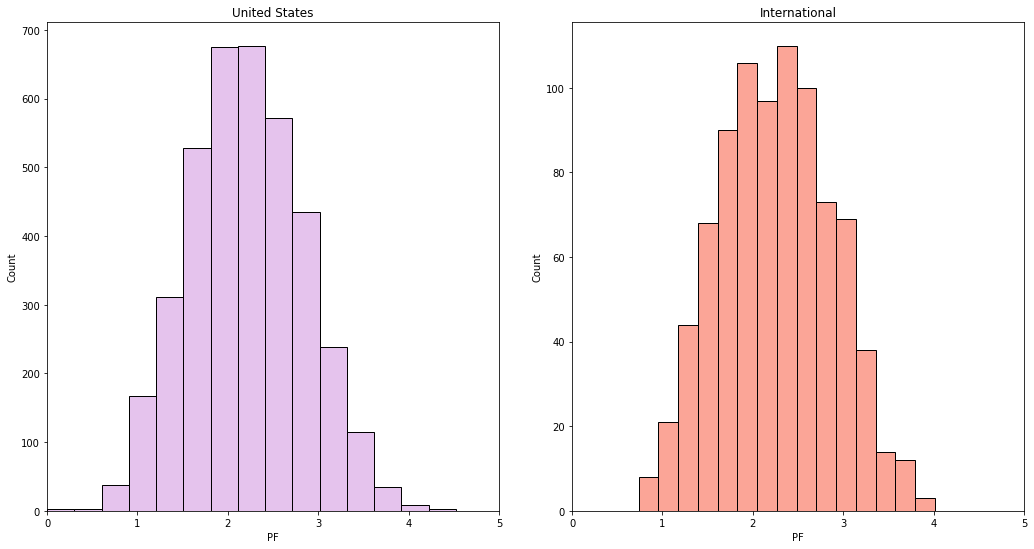

In [ ]:
stats_data(df_US, df_INT, 'PF', 15, 5)

**Note: Personal fouls are not necessarily a good performance metric, but when compared with steals we can try to develop a model that shows effectiveness on defense.**

Here we see that both distributions are very similar where the US players seem to have a greater spread.

### Rebounds

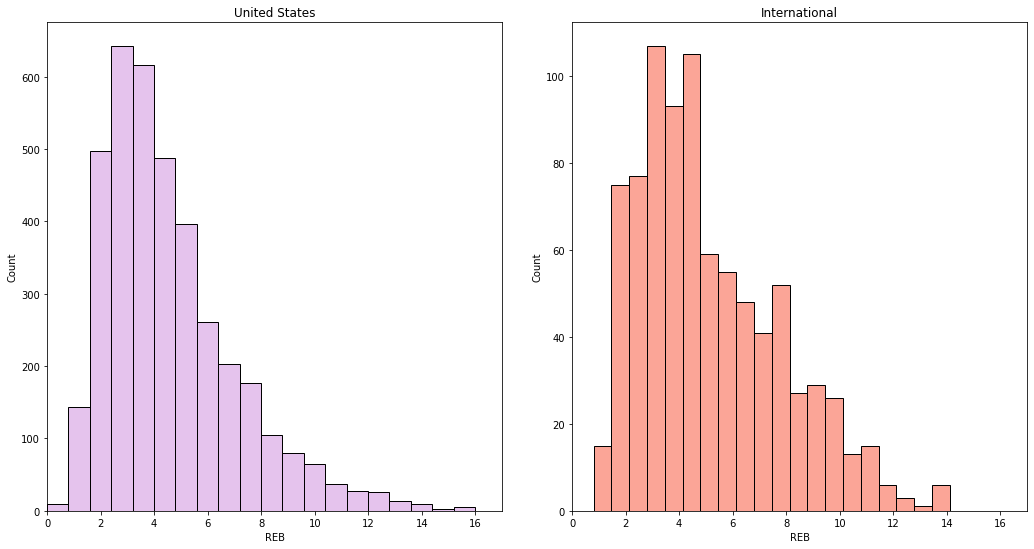

In [ ]:
stats_data(df_US, df_INT, 'REB', 20, 17)

Here we see both distributions are skewed to the right, but the US seems to peak at about 2 rebounds higher than the International distribution.

### Assists

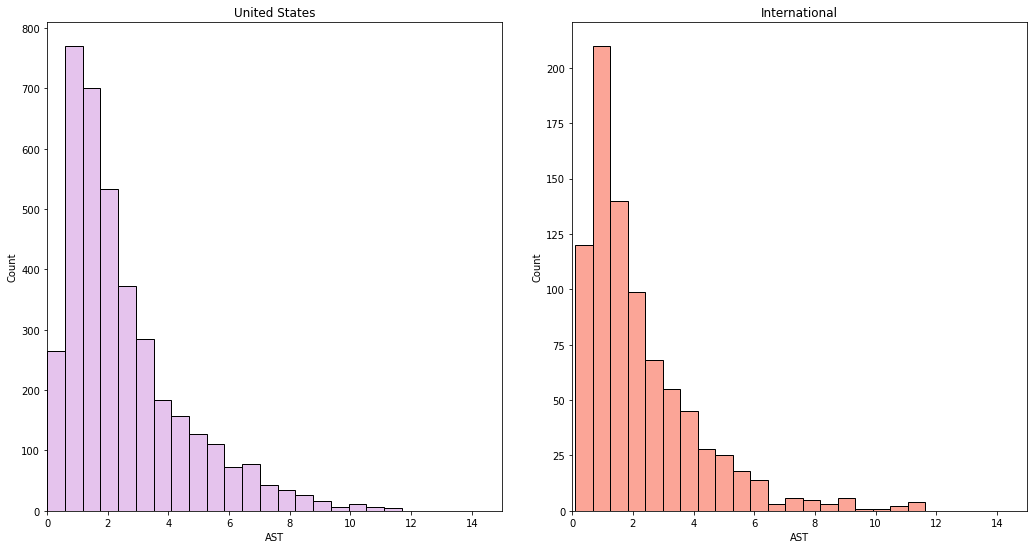

In [ ]:
stats_data(df_US, df_INT, 'AST', 20, 15)

Both distributions here are skewed right and very similar.

### Steals

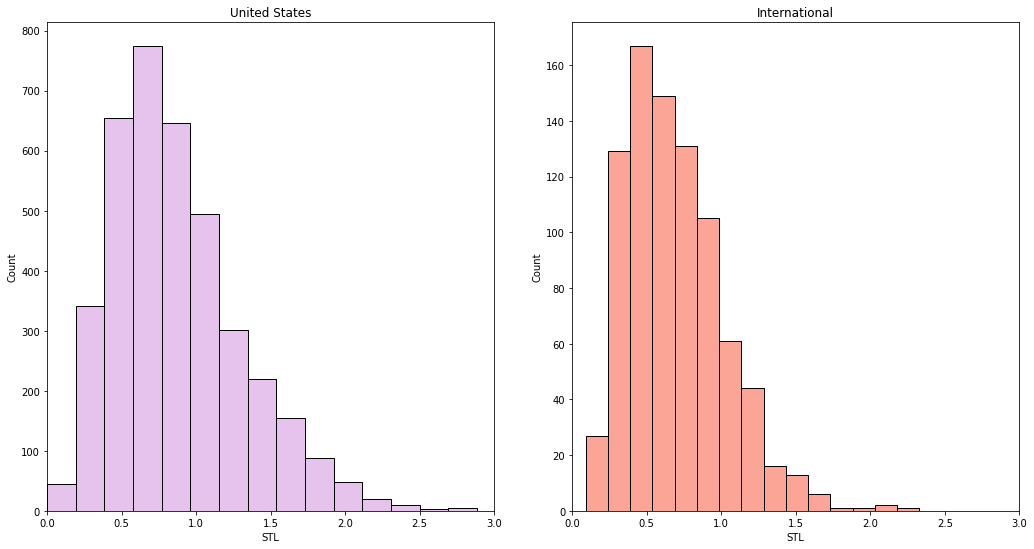

In [ ]:
stats_data(df_US, df_INT, 'STL', 15, 3)

Both distributions appear to be slightly skewed right with means of roughly 0.6

### Blocks

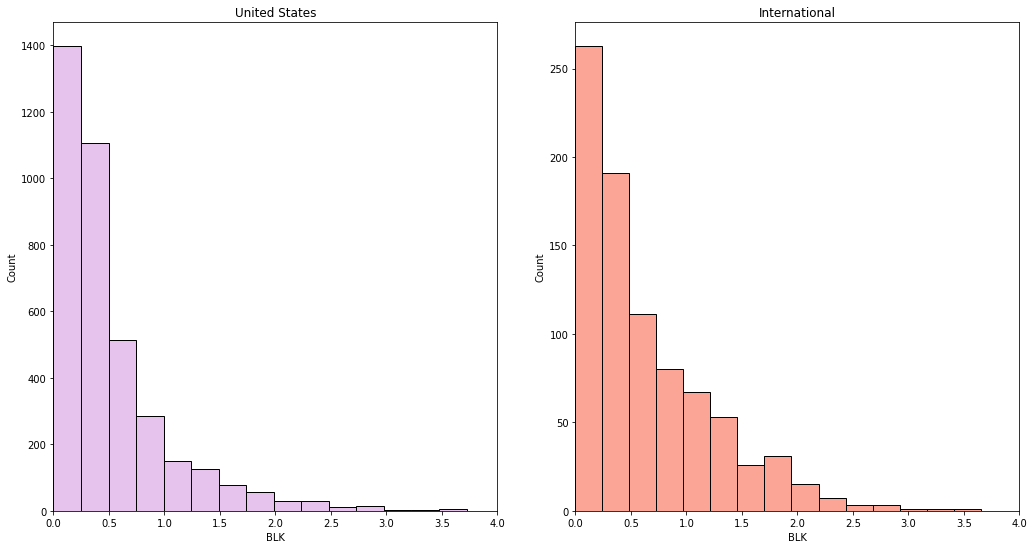

In [ ]:
stats_data(df_US, df_INT, 'BLK', 15, 4)

Both distributions are skewed right and very similar.

### Points

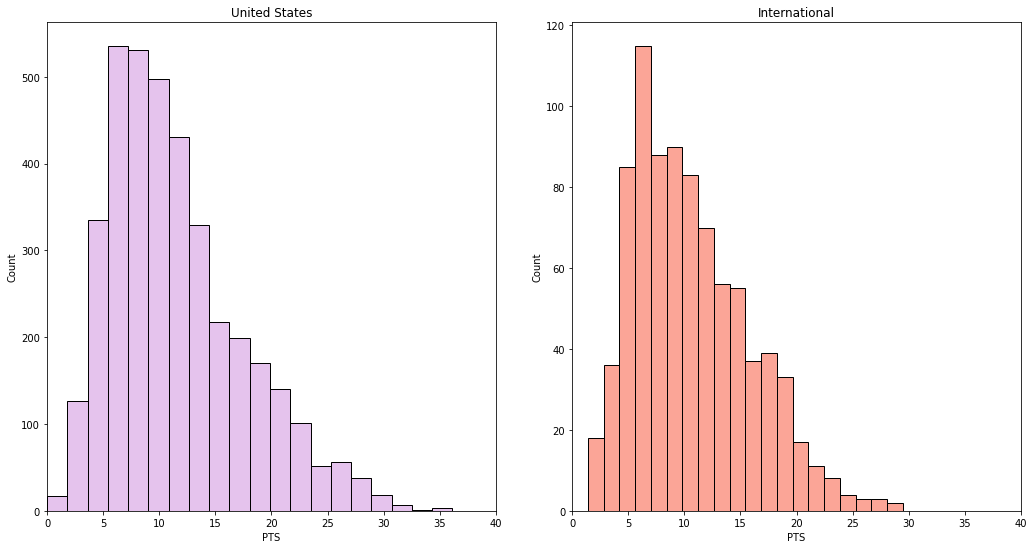

In [ ]:
stats_data(df_US, df_INT, 'PTS', 20, 40)

Both distributions are skewed right, however the US does peak at about 6-7 points higher than the International distribution.

### Points Per Possession

Points per possession measures how effectively a player can score the ball during a theoretical time window calculated through FGA, FTA, and TOV. These stats are used because they tend to be representative of how long a player has been playing. The formula:

$$\frac{Points}{FGA+0.44*FTA+TOV}$$


Points Per Possession


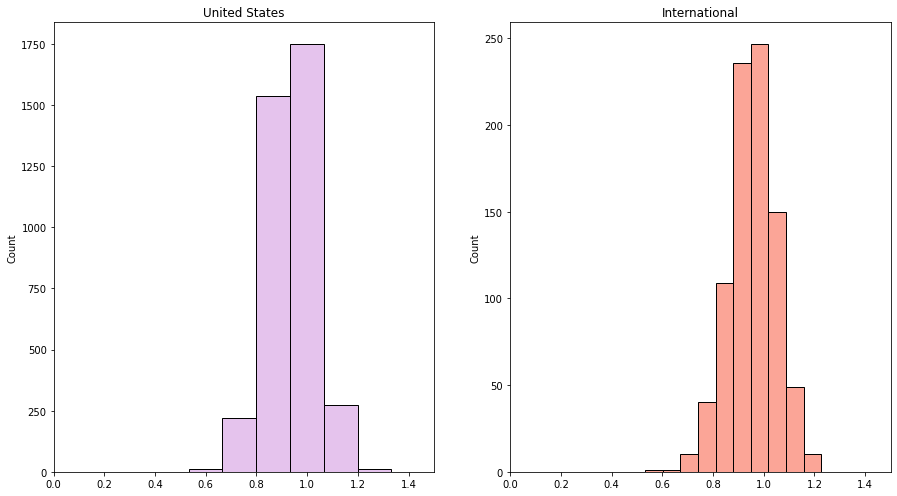

In [ ]:
def ppp_rating(US_data, INT_data, points, TO, FGA, FTA, bins):
  
  avg_US = US_data[points] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[points] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1.5), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1.5), title='International')
  fig.show()

print('Points Per Possession')
ppp_rating(df_US, df_INT, 'PTS', 'TOV', 'FGA', 'FTA', 10)

Both distributions look to be centered at about 1.

### Interpretations

From what we can see, US and international players' box score statistics tend to be the same besides some minor differences and skew between them. However, that still doesn't mean these groups are necessarily performing the same. For this next part we are going to compare two statistics together from each group(US and International). 

## Joint Stats EDA


### Assits vs Steals

This graph shows how effective a players off-ball offense and defense is. The higher this value the more effective a player is to their team when navigating the court without ball possession.

United States


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


International


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


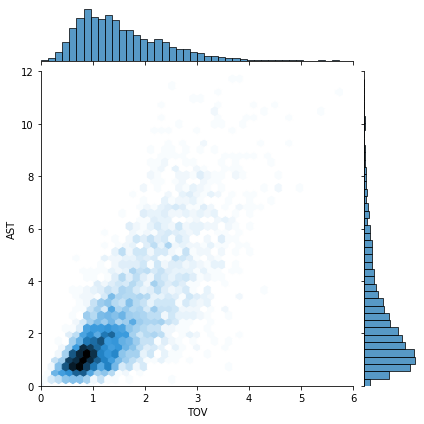

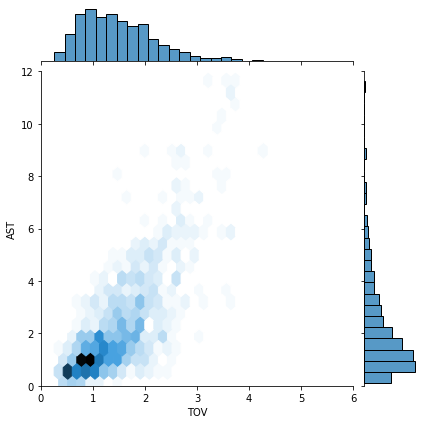

In [ ]:
print('United States')
sns.jointplot(df_US['TOV'], df_US['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

print('International')
sns.jointplot(df_INT['TOV'], df_INT['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

We see that these distributions are very similar, the only noticable difference is that the US population is significantly larger.

### Minutes vs Field-Goal Percentage

This graph shows how effective a player is at scoring based on long they are on the court. The closer a player is to the bottom right the more effective of a scorer they are.

United States


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


International


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


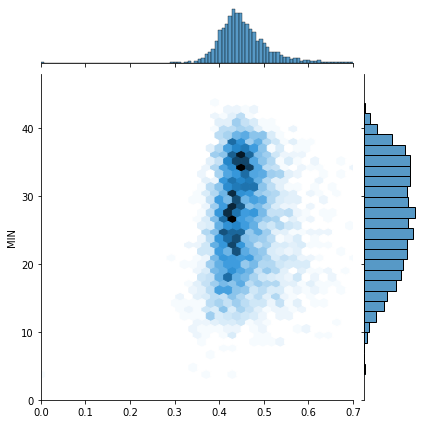

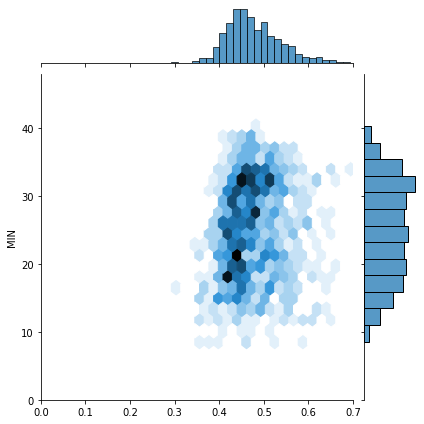

In [ ]:
USA = df_US['FGM']/df_US['FGA']
INT = df_INT['FGM']/df_INT['FGA']

print('United States')
sns.jointplot(USA, df_US['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

print('International')
sns.jointplot(INT, df_INT['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

Once again we see very similar distributions with the only noticable difference being the size n populations.

## Season-by-Season EDA
This is the most useful category in our EDA because it shows how our two groups of players have performed over time. This also helps account for the fact that years closer to 2000 didn't have as many international players as there are now, which can be seen in some graphs. Additionally, it helps us get a clearer picture of what was happening during certain seasons. Just looking at career averages doesn't give us as in-depth detail.

In [ ]:
# Combine US and International data frames together for more indepth analysis
df = pd.concat([df_US, df_INT]).reset_index()

# Rename nationalities to 'United States' and 'International'
df.loc[df['nationality'] != 'United States', 'nationality'] = 'International'

# Relabel 'Season' column so values only contain the year the season was completed
df['Season'] = df['Season'].str[7:]

In [ ]:
def compare_seasons_per(df, stat1, stat2):

  percent = df[stat1] / df[stat2]

  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=percent, hue='nationality')

def compare_seasons_stat(df, stat):
  
  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=stat, hue='nationality')

### Field-Goal Percentage Since 2000

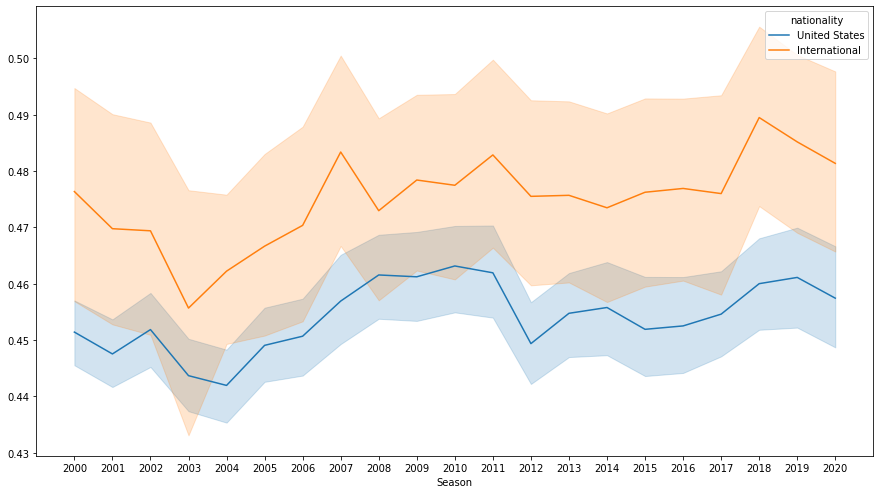

In [ ]:
# Calculating Field-Goal Percentage for every season between US and International players
compare_seasons_per(df, 'FGM', 'FGA')

Over every season, international players have had a higher average FG% than US players.

### Free-Throw Percentage Since 2000

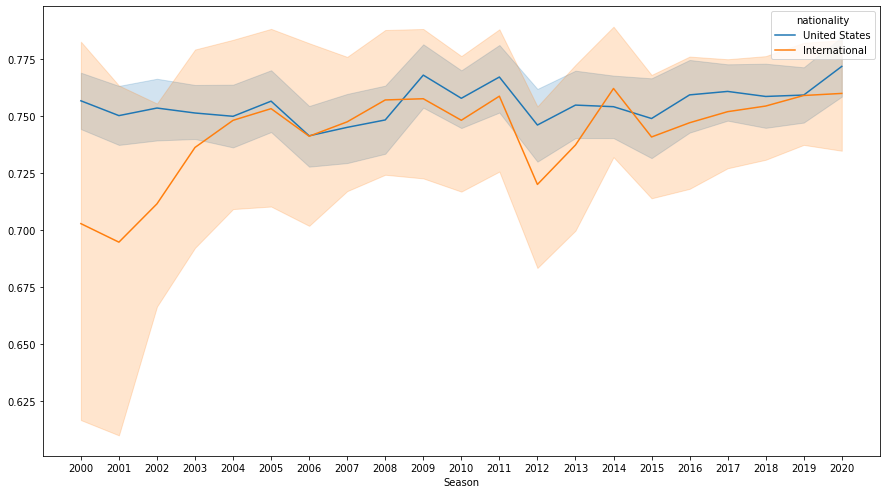

In [ ]:
# Calculating Free Throw Percentage for every season between US and International players
compare_seasons_per(df, 'FTM', 'FTA')

It is currently unknown why free throw percentage was significantly lower for international players in the early 2000s. However, as time progresses we see that they begin to become closer together.

### Rebounds Since 2000

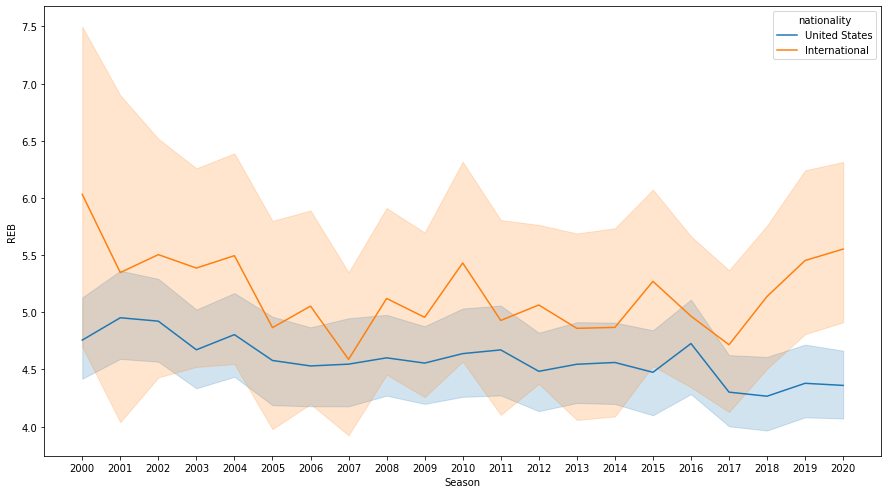

In [ ]:
# Calculate avg rebounds by each group over every season
compare_seasons_stat(df, 'REB')

Once again, we see that international players consistently have higher averages for rebounds compared to US players.

### Assists Since 2000

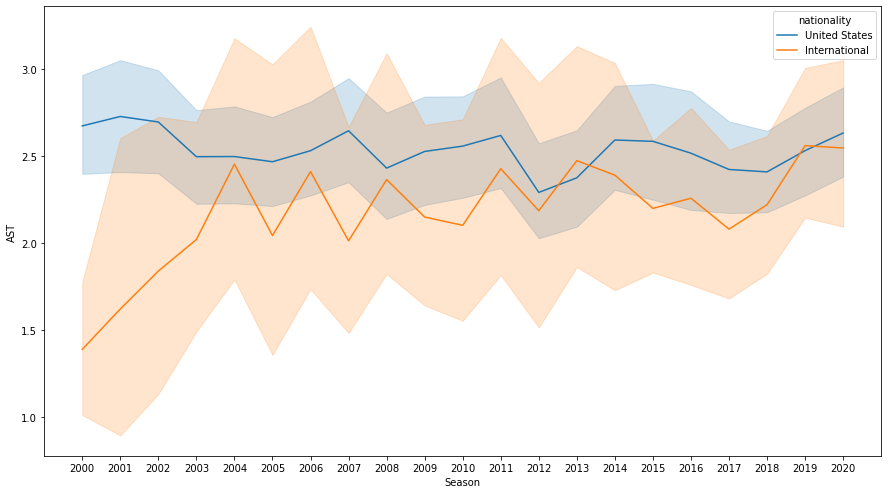

In [ ]:
# Calculate avg assists by each group over every season
compare_seasons_stat(df, 'AST')

Here we see that US players are consistently averaging more assists than international players, however it should be noted that they are still reletively close.

### Steals Since 2000

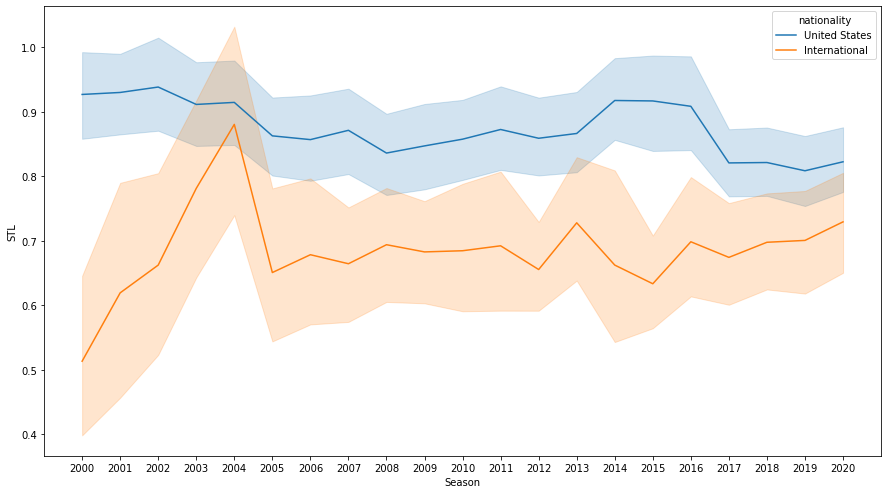

In [ ]:
# Calculate avg steals by each group over every season
compare_seasons_stat(df, 'STL')

We see that US players consistently averaged more steals than international players. However, we are unsure why international players had significantly lower averages in the early 2000s and then peaked. 

### Blocks Since 2000

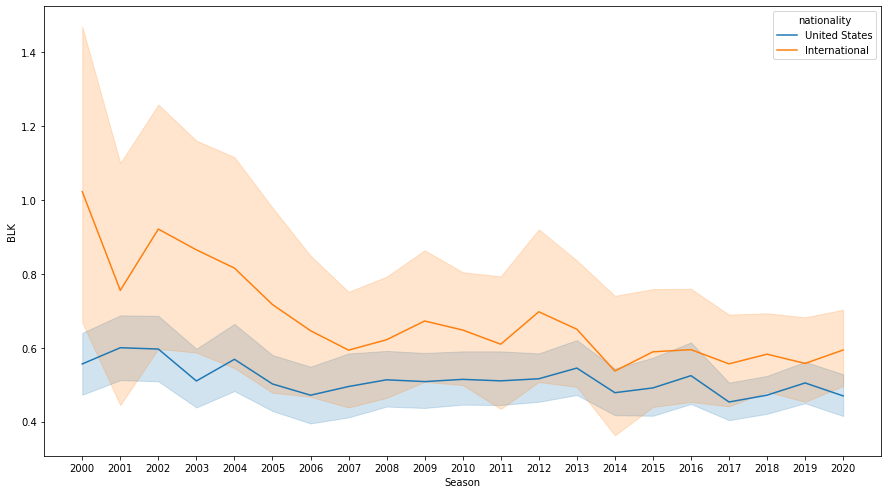

In [ ]:
# Calculate avg blocks by each group over every season
compare_seasons_stat(df, 'BLK')

We see that international players averaged more blocks than US players over every season.

### Points Since 2000

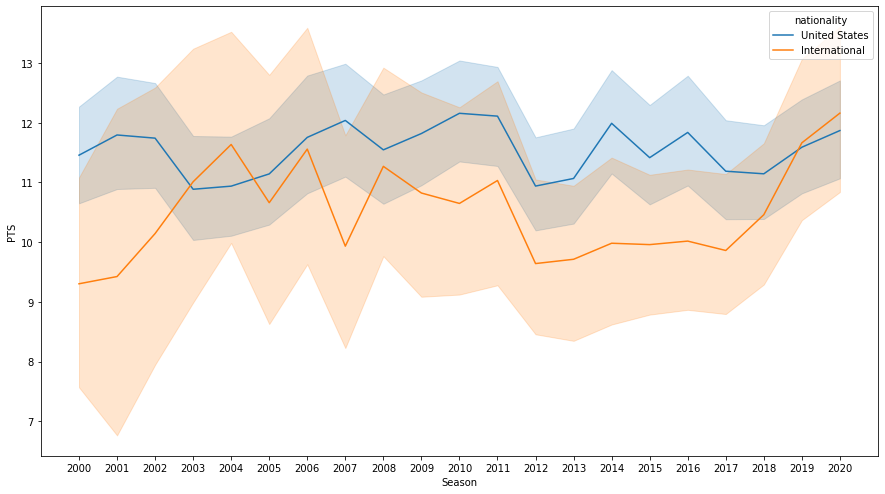

In [ ]:
# Calculate avg points by each group over every season
compare_seasons_stat(df, 'PTS')

We see that their averages tend to fluctuate a lot and they switch between having the higher average.

### Player Efficiency Rating (EFF)

This metric takes in a players box score stats and determines what their efficiency is across all the games they played a certain season. The equation for it was created by Kansas City sports reporter and statistician, Martin Manley. What we're going to do here is calculate each player's EFF every year and compare their averages between both data frames. The formula for determining EFF is: 

$$\frac{PTS + REB + AST + STL + BLK - Missed FG - Missed FT - TOV}{Games Played}$$

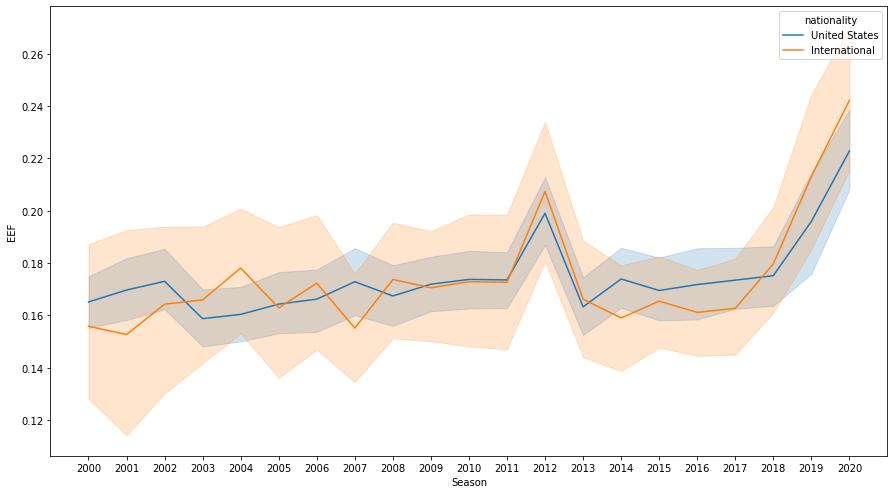

In [ ]:
# Add column for player's EFF that season
df['EFF'] = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - (df['FGA']-df['FGM']) - (df['FTA']-df['FTM']) - df['TOV'])/ df['GP']

# Calculate avg EFF rating by each group over every season
compare_seasons_stat(df, 'EFF')

We see that both groups have a similar EFF rating each season except for some where US players saw a decline. Additionally, there is a very noticable peak at 2012.

### Interpretations

Here we are able to see trends over time of US players vs International players. This is helpful because, over the past two decades, international players have become more relevant in the NBA. Additionally, we can see that, on average, International players tend to do better in certain categories than US players.

# Statistical Analysis

In order to get accurate statistical results from our data we can't just run any test on all players average career statistics. As we saw in our initial EDA, US and international players have roughly the same career stats on average, so this wouldn't really be significant. However, what we did notice is that over the past 20 years, in certain seasons international players out performed US players in certain stat categories. Another issue that we have is that our two samples have significantly different sizes (n=3000 vs n=600). This makes it slightly difficult to compare the two populations. However, one option that can work for our situation is Welch's T-Test which is a nonparametric univariate test which tests if there is a significant difference between two populations' means.



In order to do a T-Test for each season we're going to convert the 'Season' column from a string type into an int type so it is easier to work with.

In [ ]:
#df_US['Season'] = df_US['Season'].str[7:]
#df_INT['Season'] = df_INT['Season'].str[7:]

df_US['Season'] = df_US['Season'].astype(int)
df_INT['Season'] = df_INT['Season'].astype(int)

Here we create a function that takes in our US and international data frames as well as the respective stat that we are testing. It then does a T-Test on that stat for every season(2000-2020) and returns a new data frame with the results.

In [ ]:
def seasons_ttest(data1, data2, stat):
  tests = []
  for i in range(2000, 2021):
    US = data1.loc[data1['Season'] == i, stat]
    INT = data2.loc[data2['Season'] == i, stat]
    tests.append(stats.ttest_ind(US, INT, equal_var=False))

  t_values = pd.DataFrame(data=tests,columns=["Test_Statistic","p-value"])
  t_values.index += 2000
  pd.set_option('display.float_format', lambda x: '%0.5f' % x)
  t_values['Significance'] = t_values['p-value'] < 0.05

  return t_values

Now that we can determine if there is any significance in each stat's distribution between both groups, we need to determine if overall one group performed better than the other over the past 20 years. To keep things simple, if our T-Test shows that for more than 10 out of the 20 seasons there was a significant difference between the two groups for a certain stat then we will say it was truly significant.

In [ ]:
def isSignificant(data):
  counts = len(data[data['Significance'] == True])

  if counts > 10:
    return True
  else:
    return False

Now for each significant performance stat we are going to run our two functions on it and then store the results in a new data frame so for simplicity.

In [ ]:
cols = ['PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'PF', 'FG%', 'FT%', '3PFG%']

values = []

for i in cols:
  values.append(isSignificant(seasons_ttest(df_US, df_INT, i)))

results = pd.DataFrame(data=values,index=cols,columns=["Result"])

results

,Result
PTS,False
AST,False
REB,False
STL,True
BLK,False
TOV,False
PF,False
FG%,True
FT%,False
3PFG%,False


We can finally see that there are only two stat categories that US players do better than international players in: Field Goal Percentage and Steals. 

# Ethics & Privacy

Our research question involves a dataset containing sports-related statistics in which all the data is public knowledge. Thus, we won't be violating any privacy or ethical terms. Furthermore, the statistics involved are quantitative values that were objectively recorded. If, however, we are made aware of any discrepancies involving the recording of statistics, this would be investigated and taken into account. This discrepancy could be due to a nationality or popularity bias where national or more popular players have more observations. We, however, would not anticipate this to be an issue since the dataset was obtained from a reputable data scientist via Kaggle. An issue, however, that could be present is national players getting more play time than international players. We plan to address this through our analysis by comparing statistics through multiple seasons and using a metric that takes into account games played. When conducting our analysis, we need to be mindful when comparing all national players against all international players in the NBA. We are well aware that the population of national players will be significantly larger than the population of international players. To address this issue, we will make the reader aware of our population sizes throughout our study and make our inferences with this bias in mind.

# Conclusion & Discussion

We originally set out to compare international and national player performance in the NBA. To accomplish this, we analyzed statistics for all regular season games held for every NBA player since the 1999-2000 season. We had a mixture of data that was mostly normally distributed or skewed right with few outliers which helped for various statistical tests. Looking at the EDA, we can see international players pulling ahead in field-goal percentage, rebounds, and blocks. On the other hand, we can only affirm that national players pull ahead in steals as points, assists, and free-throw percentage are too close of a contest especially in recent seasons.

From our Welch's T-Test, we cannot conclude that national players outperform international players in the NBA. We can see that, out of the ten stats we observed, national players only perform significantly better in two of them. These stats included steals and field-goal percentage. Better performance in these two stats alone is not enough evidence for us to say, without a doubt, that national players perform better than international players.

Though we concluded that national players, in general, do not outperform international players, this does not imply that international players outperform national players. It sets the stage to investigate whether international players perform as well as or better than national players. Many of our statistics, mainly the EFF which we based our player ratings by, showed marginal differences and fluctuated from season to season. Furthermore, our study was not without its limitations.

The biggest limitation our study faced was the sample size of international players. The number of national players in the NBA is, understandably, larger when compared to international players. This can lead to bias as the spread of data for national players may be higher than for international players. Additionally, because of the major commitment that moving continents entails, it is likely that only the most elite international talent comes overseas to the NBA. Thus, this study is not a pure representation of international and national players. This is only a comparison of NBA players.

Overall, our work will contribute to the literature of basketball statistics and perhaps agents searching for talent. The international scene still has a ways to go in terms of development and this piece may serve as motivation to further invest in overseas talent. We acknowledge the limitations of our study, but, regardless, we hope our work proves insightful in some capacity.

# Team Contributions

**Colby Hillers:** EDA & Inferential Analysis, Statistical Analysis, Notebook Organization, Writeups

**Calvin Cheung:** Overview, Research Question, Background, Hypothesis, Data Cleaning, Ethics, Conclusion

**Jorge Mendoza:** Background and Dataset

**Javon Maxie:** Data Cleaning, Statistical Analysis

**Hoang Nguyen:** Project Idea, Research, Video Presentation, Documentation